# Sieć Dwuwarstwowa

### Import potrzebnych bibliotek

In [1]:

import pandas as pd
import numpy as np

from Siec_dwuwarstwowa.init2 import init2
from Siec_dwuwarstwowa.dzialaj2 import calculate_outputs
from Siec_dwuwarstwowa.ucz2 import ucz2

### Załadowanie danych uczących

### Przykład XOR

In [2]:
P = np.array([[0,0,1,1], 
              [0,1,0,1]] )  # Wejścia sieci

T = np.array([0,1,1,0])   # żądane wyjście sieci


### Inicjalizacja macierzy wag dla każdej z warstw

In [3]:
W1_matrix, W2_matrix = init2(2, 2, 1)

print(W1_matrix)
print(W2_matrix)
print(P[:,0])

[[ 0.06528249 -0.08498895  0.03356422]
 [-0.02540514  0.00256108  0.08848482]]
[[ 0.00384145 -0.07295299 -0.00921101]]
[0 0]


In [4]:
W1 = np.array([[0.05, -0.21, -1],
             [-0.61, 0.01,  -1]])
    
X1 = [0, 0, -1]

print(np.dot(W1,X1))

[1. 1.]


In [5]:
Y1, Y2a = calculate_outputs(W1_matrix, W2_matrix, P[:, 0] )
print(Y1)
print(Y2a)
Y1, Y2a = calculate_outputs(W1_matrix, W2_matrix, P[:, 1] )
print(Y1)
print(Y2a)
Y1, Y2a = calculate_outputs(W1_matrix, W2_matrix, P[:, 2] )
print(Y1)
print(Y2a)
Y1, Y2a = calculate_outputs(W1_matrix, W2_matrix, P[:, 3] )
print(Y1)
print(Y2a)

[ 0.45814292  0.39116351 -1.        ]
[0.4780571]
[ 0.35600049  0.39421739 -1.        ]
[0.47728968]
[ 0.53956495  0.36136379 -1.        ]
[0.48116037]
[ 0.43380255  0.36432424 -1.        ]
[0.4803837]


In [6]:
W1po, W2po, mse_history = ucz2(W1_matrix, W2_matrix, P, T, 20000, 1e-9)

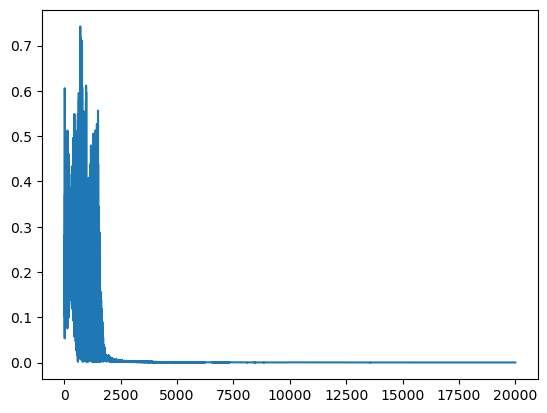

In [7]:
import matplotlib.pyplot as plt

plt.plot(mse_history)
plt.show()

In [8]:
_, Y2a = calculate_outputs(W1po, W2po, P[:, 0] )
print(f"dla wejścia XOR(0,0) = {Y2a}   (oczekiwane 0)")
_, Y2a = calculate_outputs(W1po, W2po, P[:, 1] )
print(f"dla wejścia XOR(0,1) = {Y2a}   (oczekiwane 1)")
_, Y2a = calculate_outputs(W1po, W2po, P[:, 2] )
print(f"dla wejścia XOR(1,0) = {Y2a}   (oczekiwane 1)")
_, Y2a = calculate_outputs(W1po, W2po, P[:, 3] )
print(f"dla wejścia XOR(1,1) = {Y2a}   (oczekiwane 0)")

dla wejścia XOR(0,0) = [0.00918347]   (oczekiwane 0)
dla wejścia XOR(0,1) = [0.99002353]   (oczekiwane 1)
dla wejścia XOR(1,0) = [0.98976731]   (oczekiwane 1)
dla wejścia XOR(1,1) = [0.01229789]   (oczekiwane 0)
